In [3]:
import pandas as pd
import matplotlib.pyplot as plt

trades=pd.read_csv('historical_data.csv', on_bad_lines='skip', low_memory=False)
sentiment=pd.read_csv('fear_greed_index.csv')

print(trades.head())
print(sentiment.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash  \
0         0.0  0xec09451986a1874e3a9

In [4]:
print(trades.info())
print(sentiment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186595 entries, 0 to 186594
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           186595 non-null  object 
 1   Coin              186595 non-null  object 
 2   Execution Price   186595 non-null  float64
 3   Size Tokens       186595 non-null  float64
 4   Size USD          186595 non-null  float64
 5   Side              186595 non-null  object 
 6   Timestamp IST     186595 non-null  object 
 7   Start Position    186594 non-null  float64
 8   Direction         186594 non-null  object 
 9   Closed PnL        186594 non-null  float64
 10  Transaction Hash  186594 non-null  object 
 11  Order ID          186594 non-null  float64
 12  Crossed           186594 non-null  object 
 13  Fee               186594 non-null  float64
 14  Trade ID          186594 non-null  float64
 15  Timestamp         186594 non-null  float64
dtypes: float64(9), objec

In [22]:
trades["Timestamp IST"]=pd.to_datetime(
    trades["Timestamp IST"],
    format="%d-%m-%Y %H:%M",
    errors='coerce')
trades["Date"]=trades["Timestamp IST"].dt.normalize()

sentiment["date"]=pd.to_datetime(sentiment["date"] , errors='coerce')
sentiment["Date"]= sentiment["date"].dt.normalize()


In [23]:
print(trades["Date"].min(),trades["Date"].max())
print(sentiment["Date"].min(),sentiment["Date"].max())

2023-05-01 00:00:00 2025-05-01 00:00:00
2018-02-01 00:00:00 2025-05-02 00:00:00


In [24]:
merged=pd.merge(trades, sentiment, on="Date" , how="inner")
print(merged.head())
print(merged.shape)

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL  ...      Order ID  Crossed       Fee      Trade ID  Timestamp  \
0         0.

In [25]:
merged.rename(columns={
    "Closed PnL":"profit",
    "classification": "sentiment"
}, inplace=True)





In [26]:
merged["is_profit"]= merged["profit"] > 0

In [27]:
print(merged[["profit","sentiment","is_profit"]].head())

   profit      sentiment  is_profit
0     0.0  Extreme Greed      False
1     0.0  Extreme Greed      False
2     0.0  Extreme Greed      False
3     0.0  Extreme Greed      False
4     0.0  Extreme Greed      False


In [28]:
merged["is_profit"].value_counts()

,count
is_profit,
False,108065
True,78523


In [30]:
summary=merged.groupby("sentiment").agg({
    "profit":["mean","sum"],
    "is_profit":["mean"]
})
print(summary)


                  profit               is_profit
                    mean           sum      mean
sentiment                                       
Extreme Fear   26.009460  4.717076e+05  0.369762
Extreme Greed  69.284226  2.623309e+06  0.477273
Fear           53.664251  2.823062e+06  0.435711
Greed          34.248583  1.596669e+06  0.384770
Neutral        41.202154  1.292223e+06  0.410898


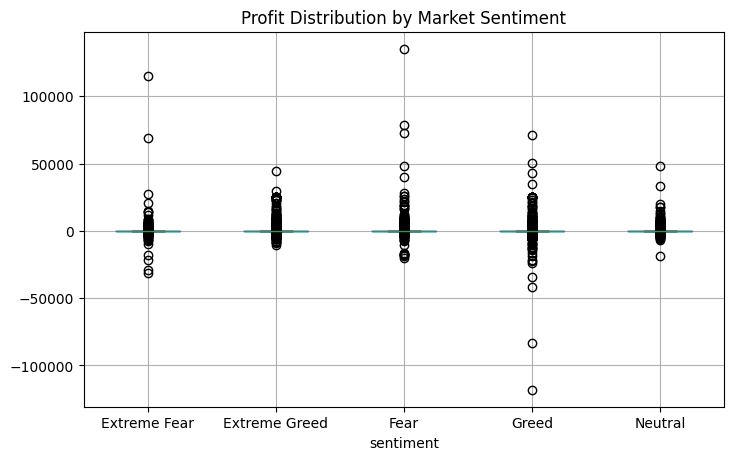

In [36]:
import matplotlib.pyplot as plt

merged.boxplot(column="profit", by="sentiment", figsize=(8, 5))
plt.title("Profit Distribution by Market Sentiment")
plt.suptitle("")
plt.savefig("profit_by_sentiment.png", dpi=300,bbox_inches="tight")
plt.show()

In [37]:
merged.groupby("sentiment")["profit"].describe()

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
Extreme Fear,18136.0,26.009460,1165.795767,-31036.69194,0.0,0.0,4.889954,115287.00000
Extreme Greed,37863.0,69.284226,781.347379,-10259.46800,0.0,0.0,10.425780,44223.45187
Fear,52606.0,53.664251,960.095209,-19841.24014,0.0,0.0,5.575964,135329.09010
Greed,46620.0,34.248583,1058.858673,-117990.10410,0.0,0.0,4.668537,71535.71674
Neutral,31363.0,41.202154,521.378076,-18993.46842,0.0,0.0,4.335670,48504.09555
